In [1]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv")

In [3]:
df.head()

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [11]:
# Defining column names based on our project description.
column_names = [
    "months_as_customer", "age", "policy_number", "policy_bind_date", "policy_state", 
    "policy_csl", "policy_deductable", "policy_annual_premium", "umbrella_limit", 
    "insured_zip", "insured_sex", "insured_education_level", "insured_occupation", 
    "insured_hobbies", "insured_relationship", "capital-gains", "capital-loss", 
    "incident_date", "incident_type", "collision_type", "incident_severity", 
    "authorities_contacted", "incident_state", "incident_city", "incident_location", 
    "incident_hour_of_the_day", "number_of_vehicles_involved", "property_damage", 
    "bodily_injuries", "witnesses", "police_report_available", "total_claim_amount", 
    "injury_claim", "property_claim", "vehicle_claim", "auto_make", "auto_model", 
    "auto_year", "fraud_reported" ,"_c39"
]

In [12]:
# Loading the dataset with specified column names
link = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv"
df = pd.read_csv(link, names=column_names, header=None)

In [13]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


# Exploratory Data Analysis

In [14]:
# Checking the dimensions of the dataset.
df.shape

(1000, 40)

In [15]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [16]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [18]:
df.duplicated().sum()

0

In [19]:
# Checking value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64


policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, L

In [21]:
df.isin(['?']).sum().any()

True

In [22]:
df=df.replace('?',np.NaN)

In [23]:
df.isnull().sum().sort_values(ascending = False)

_c39                           1000
property_damage                 360
police_report_available         343
collision_type                  178
authorities_contacted            91
bodily_injuries                   0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
fraud_reported                    0
auto_year                         0
auto_model                        0
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim                     0
auto_make                         0
witnesses                         0
months_as_customer                0
age                               0
insured_zip                       0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable           

1. 'property_damage','police_report_available','collision_type' and 'authoriries_contacted'contain missing values.
2. '_c39' column has all the values as null.SO, we are going to drop it.
3. Other missing value features are categorical in nature, So we will impute them with mode of that particular category.Here median and mean will not work as they are suited for numerical features.

### Missing value imputation

In [24]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)

In [25]:
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0],inplace=True)

In [26]:
# Dropping unnecessary columns.
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

<Axes: >

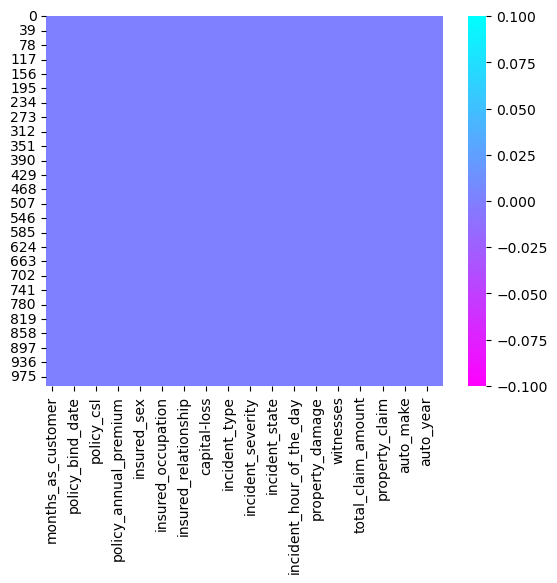

In [27]:
# Now visualize using heatmap.
sns.heatmap(df.isnull(), cmap = "cool_r")

We can see that in the dataset 'policy_csl' columns have numerical data separated by '/', resulting into object datatype.So we can maybe split into 2 columns for person and accident.Also, there are columns like 'policy_bind_date' and 'incident_date' which are date time columns but shown as object type, so we will change it too and can separate them as day, month and year.

In [28]:
# Spliting and extracting 'policy_csl' at '/' :-
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [29]:
# Now we can drop the 'policy_csl' column. 
df.drop("policy_csl",axis=1,inplace=True)

In [30]:
# Converting Date columns from object type into datetime data type.
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [31]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

In [32]:
# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [33]:
# Since Extraction is done now we can drop policy_bind_date and incident_date columns.
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [34]:
# Incident year for all data is 2015 so we will drop it.
df.drop(['incident_year'],axis=1,inplace=True)

We have column as auto_year,So here we will do some simple feature engineering to create new columns with automobile age and drop eariler one.

In [35]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2015
df['Automobile_Age']=2015 - df['auto_year']

# Droping 'auto_year' column.
df.drop('auto_year',axis=1,inplace=True)

###### Splitting into categorical and numerical columns.

In [36]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']

In [37]:
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

# Description of Dataset

In [38]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,...,52761.94000,7433.420000,7399.570000,37928.950000,15.448000,6.559000,2001.604000,14.995000,1.496000,9.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,...,26401.53319,4880.951853,4824.726179,18886.252893,8.808001,3.499824,7.360391,8.670995,0.523697,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,...,100.00000,0.000000,0.000000,70.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,...,41812.50000,4295.000000,4445.000000,30292.500000,8.000000,3.000000,1995.000000,7.750000,1.000000,5.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,...,58055.00000,6775.000000,6750.000000,42100.000000,16.000000,7.000000,2002.000000,15.000000,1.000000,10.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,...,70592.50000,11305.000000,10885.000000,50822.500000,23.000000,10.000000,2008.000000,22.000000,2.000000,15.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,...,114920.00000,21450.000000,23670.000000,79560.000000,31.000000,12.000000,2015.000000,31.000000,3.000000,20.000000


We can see that maximum age is 64 while minimum age is 19 years.Average age is nearly 38 years.Also maximum number of vehicles involved are 4 and minimum 1.Maximum total claim amount is 114920 while minimum is only 100.Maximum automobile age is 20 years.

Due to differences in 75% and max we can see that outliers might be present and skewness too.

# Data Visualization

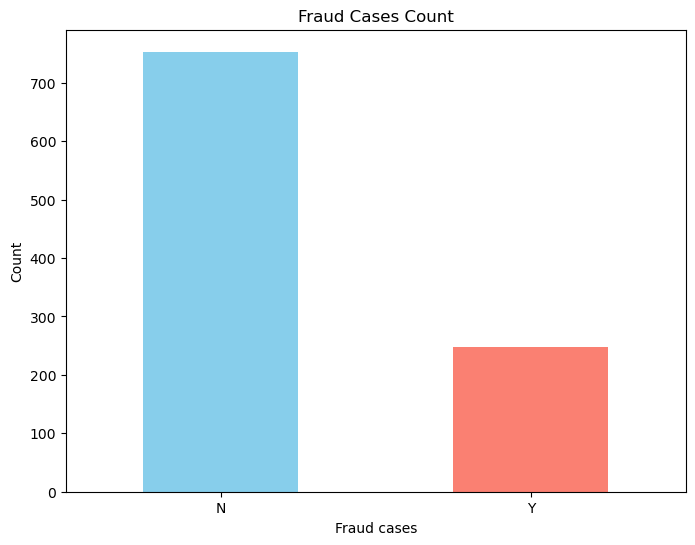

In [40]:
# Plotting fraud cases distribution
plt.figure(figsize=(8, 6))
df['fraud_reported'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Fraud Cases Count')
plt.xlabel('Fraud cases')
plt.ylabel('Count')
plt.xticks([0, 1], ['N', 'Y'], rotation=0)
plt.show()

We can clearly see that our target variable is highly imbalanced, so we will balance it later using SMOTE.Also there were less cases which were fraud.

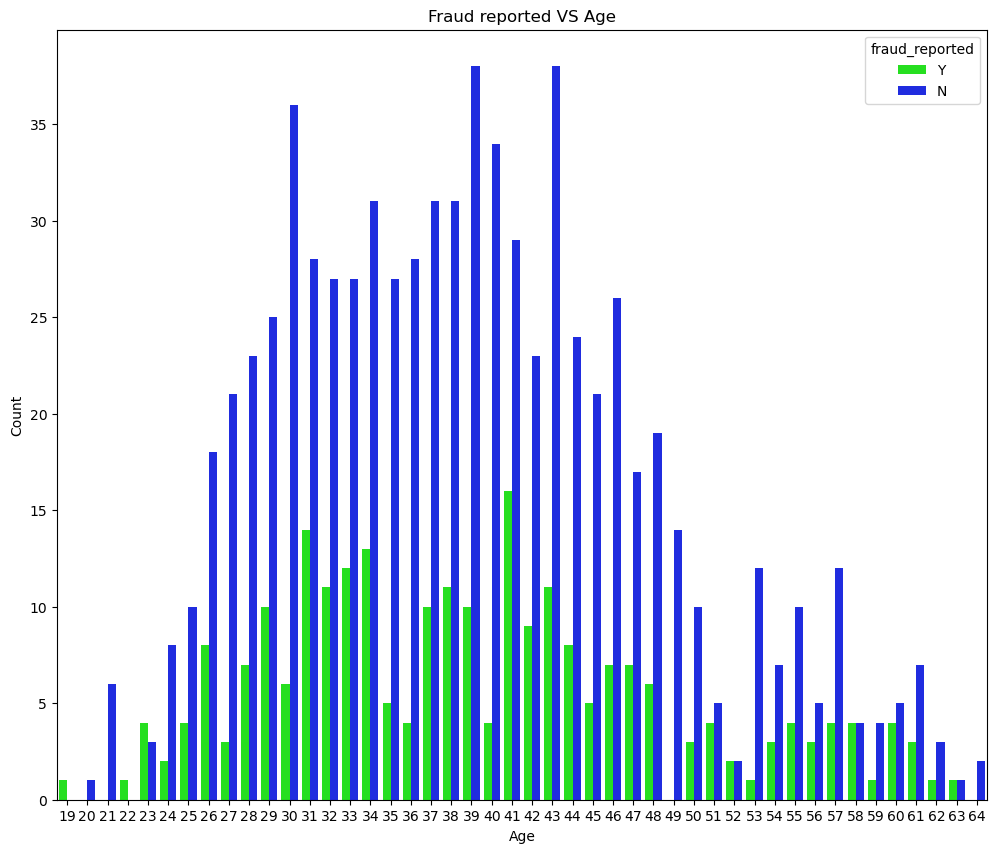

In [41]:
plt.figure(figsize=(12, 10))
sns.countplot(x='age', hue='fraud_reported', data=df, palette='hsv')
plt.title('Fraud reported VS Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='fraud_reported')
plt.show()

Maximum fraud cases were from age group 31-51 years and cases declined after that.

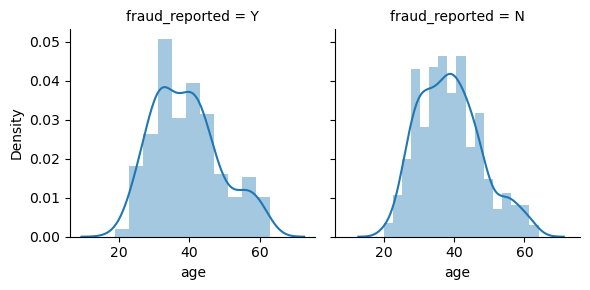

In [42]:
# Distribution of age with fraud reported categories.
ax= sns.FacetGrid(df,col='fraud_reported')
ax.map(sns.distplot,'age')
plt.show()

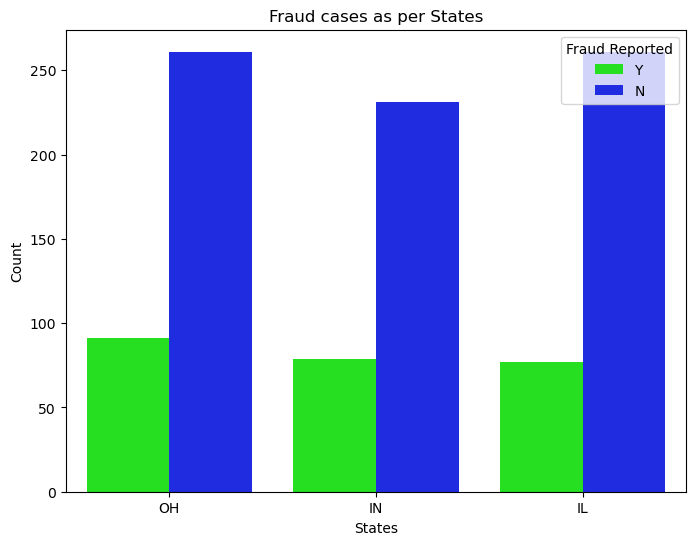

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='policy_state',hue='fraud_reported', data=df, palette='hsv')
plt.title('Fraud cases as per States')
plt.xlabel('States')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

We can see that nearly same number of cases were reported and maximum fraud cases were from state (OH).

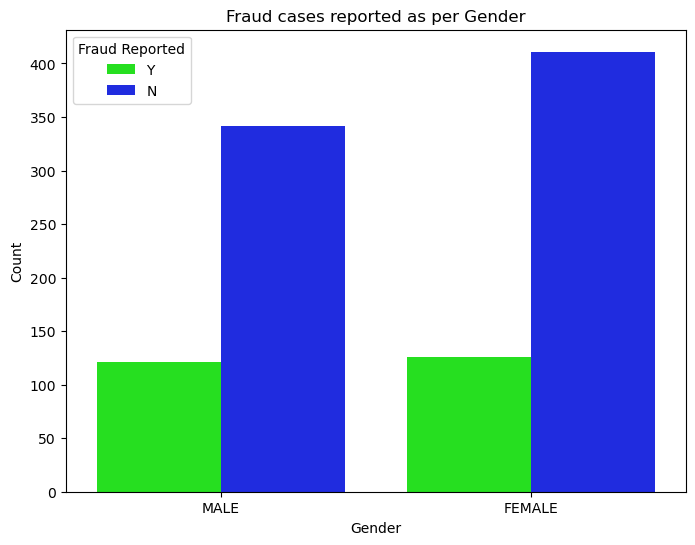

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='insured_sex',hue='fraud_reported', data=df, palette='hsv')
plt.title('Fraud cases reported as per Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

Maximum number of fraud cases were reported by female. Also the cases reported truly right are nearly same.

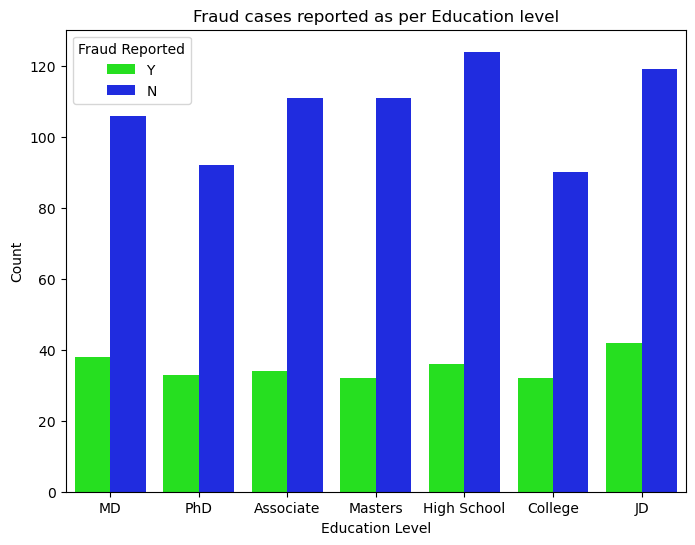

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='insured_education_level',hue='fraud_reported', data=df, palette='hsv')
plt.title('Fraud cases reported as per Education level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

We can see that even in the education field maximum fraud cases are reported, even in Masters,PhD too. 

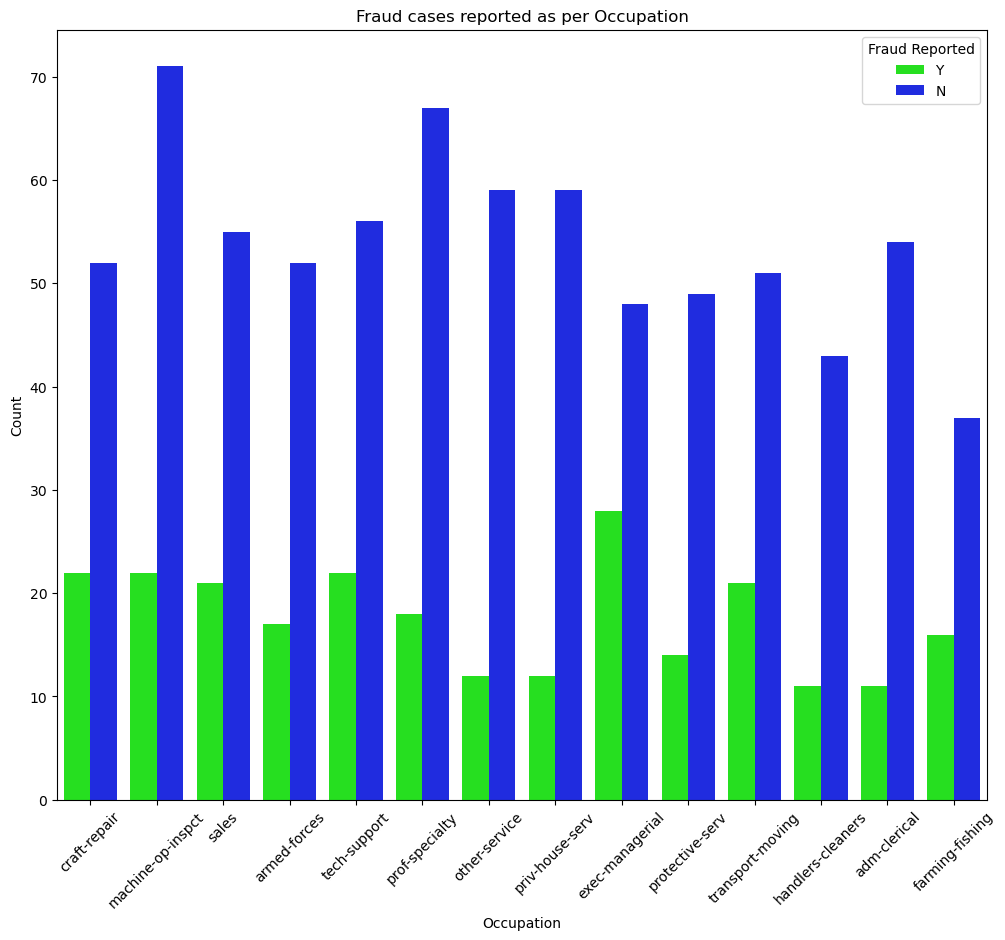

In [48]:
plt.figure(figsize=(12, 10))
sns.countplot(x='insured_occupation',hue='fraud_reported', data=df, palette='hsv')
plt.title('Fraud cases reported as per Occupation')
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

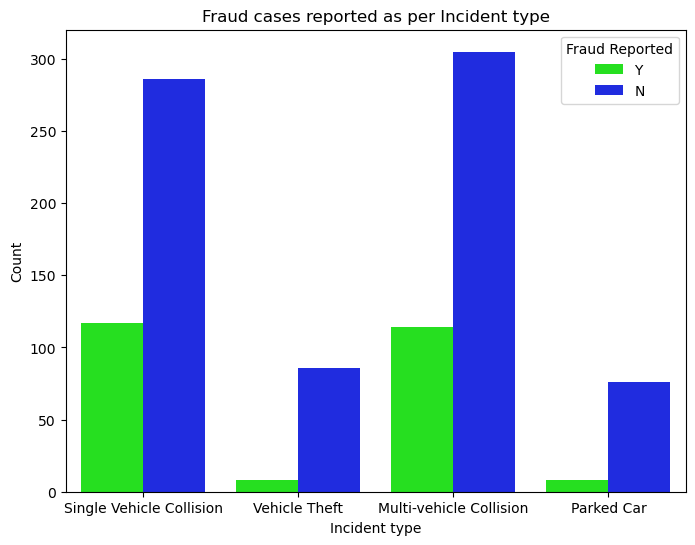

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='incident_type',hue='fraud_reported', data=df, palette='hsv')
plt.title('Fraud cases reported as per Incident type')
plt.xlabel('Incident type')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

Although, here too fraud cases are reported and maximum cases are of Multiple-vehicle collision. But truly reported cases are maximum in Single vehicle collision and in multiple vehicle collision. 

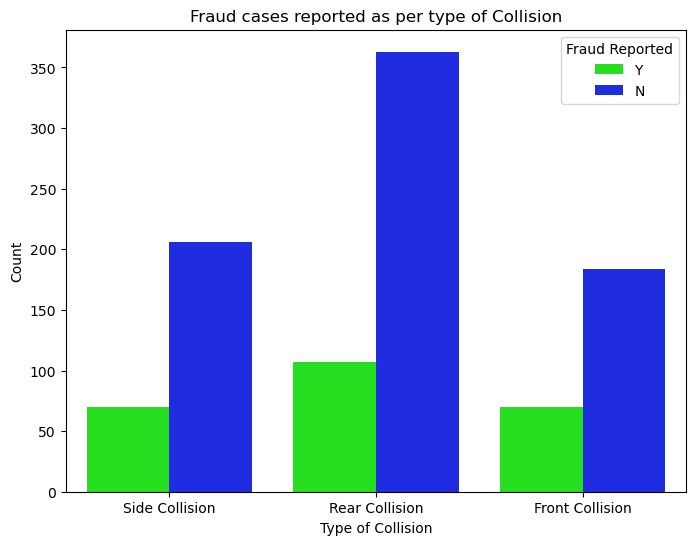

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='collision_type',hue='fraud_reported', data=df, palette='hsv')
plt.title('Fraud cases reported as per type of Collision')
plt.xlabel('Type of Collision')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

Both maximum number of fraud cases and truly right cases were reported in Rear collision.

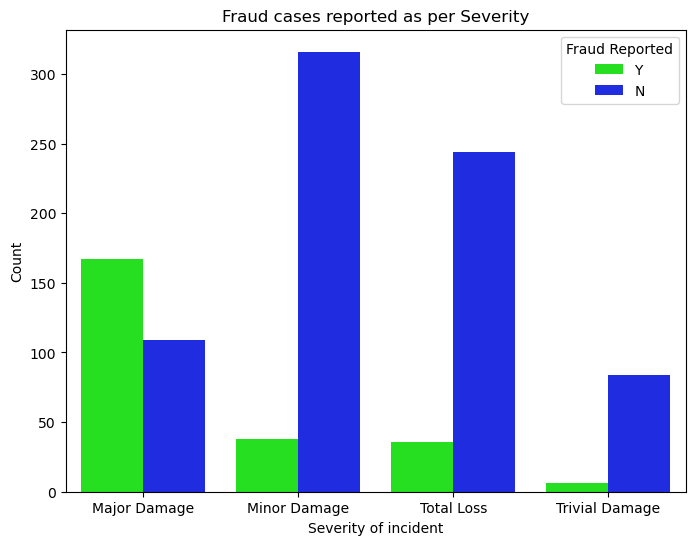

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(x='incident_severity',hue='fraud_reported', data=df, palette='hsv')
plt.title('Fraud cases reported as per Severity')
plt.xlabel('Severity of incident')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

Maximum number of truly reported cases were seen in the case of major damage. Minor damage and total loss are nearly same. Maximum cases of fraud are seen in minor damage.

In [52]:
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,250,500,17,10,2014,25,1,11
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,Y,250,500,27,6,2006,21,1,8
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,100,300,6,9,2000,22,2,8
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,250,500,25,5,1990,10,1,1
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,Police,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,500,1000,6,6,2014,17,2,6


# Encoding Categorical Columns

In [53]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [54]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,3,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,1,2,17,10,2014,25,1,11
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,3,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,1,1,2,27,6,2006,21,1,8
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,3,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,0,1,6,9,2000,22,2,8
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,3,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,1,2,25,5,1990,10,1,1
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,3,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,2,0,6,6,2014,17,2,6


# Feature Selection and Engineering

## Outlier Detection and Removal

In [55]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

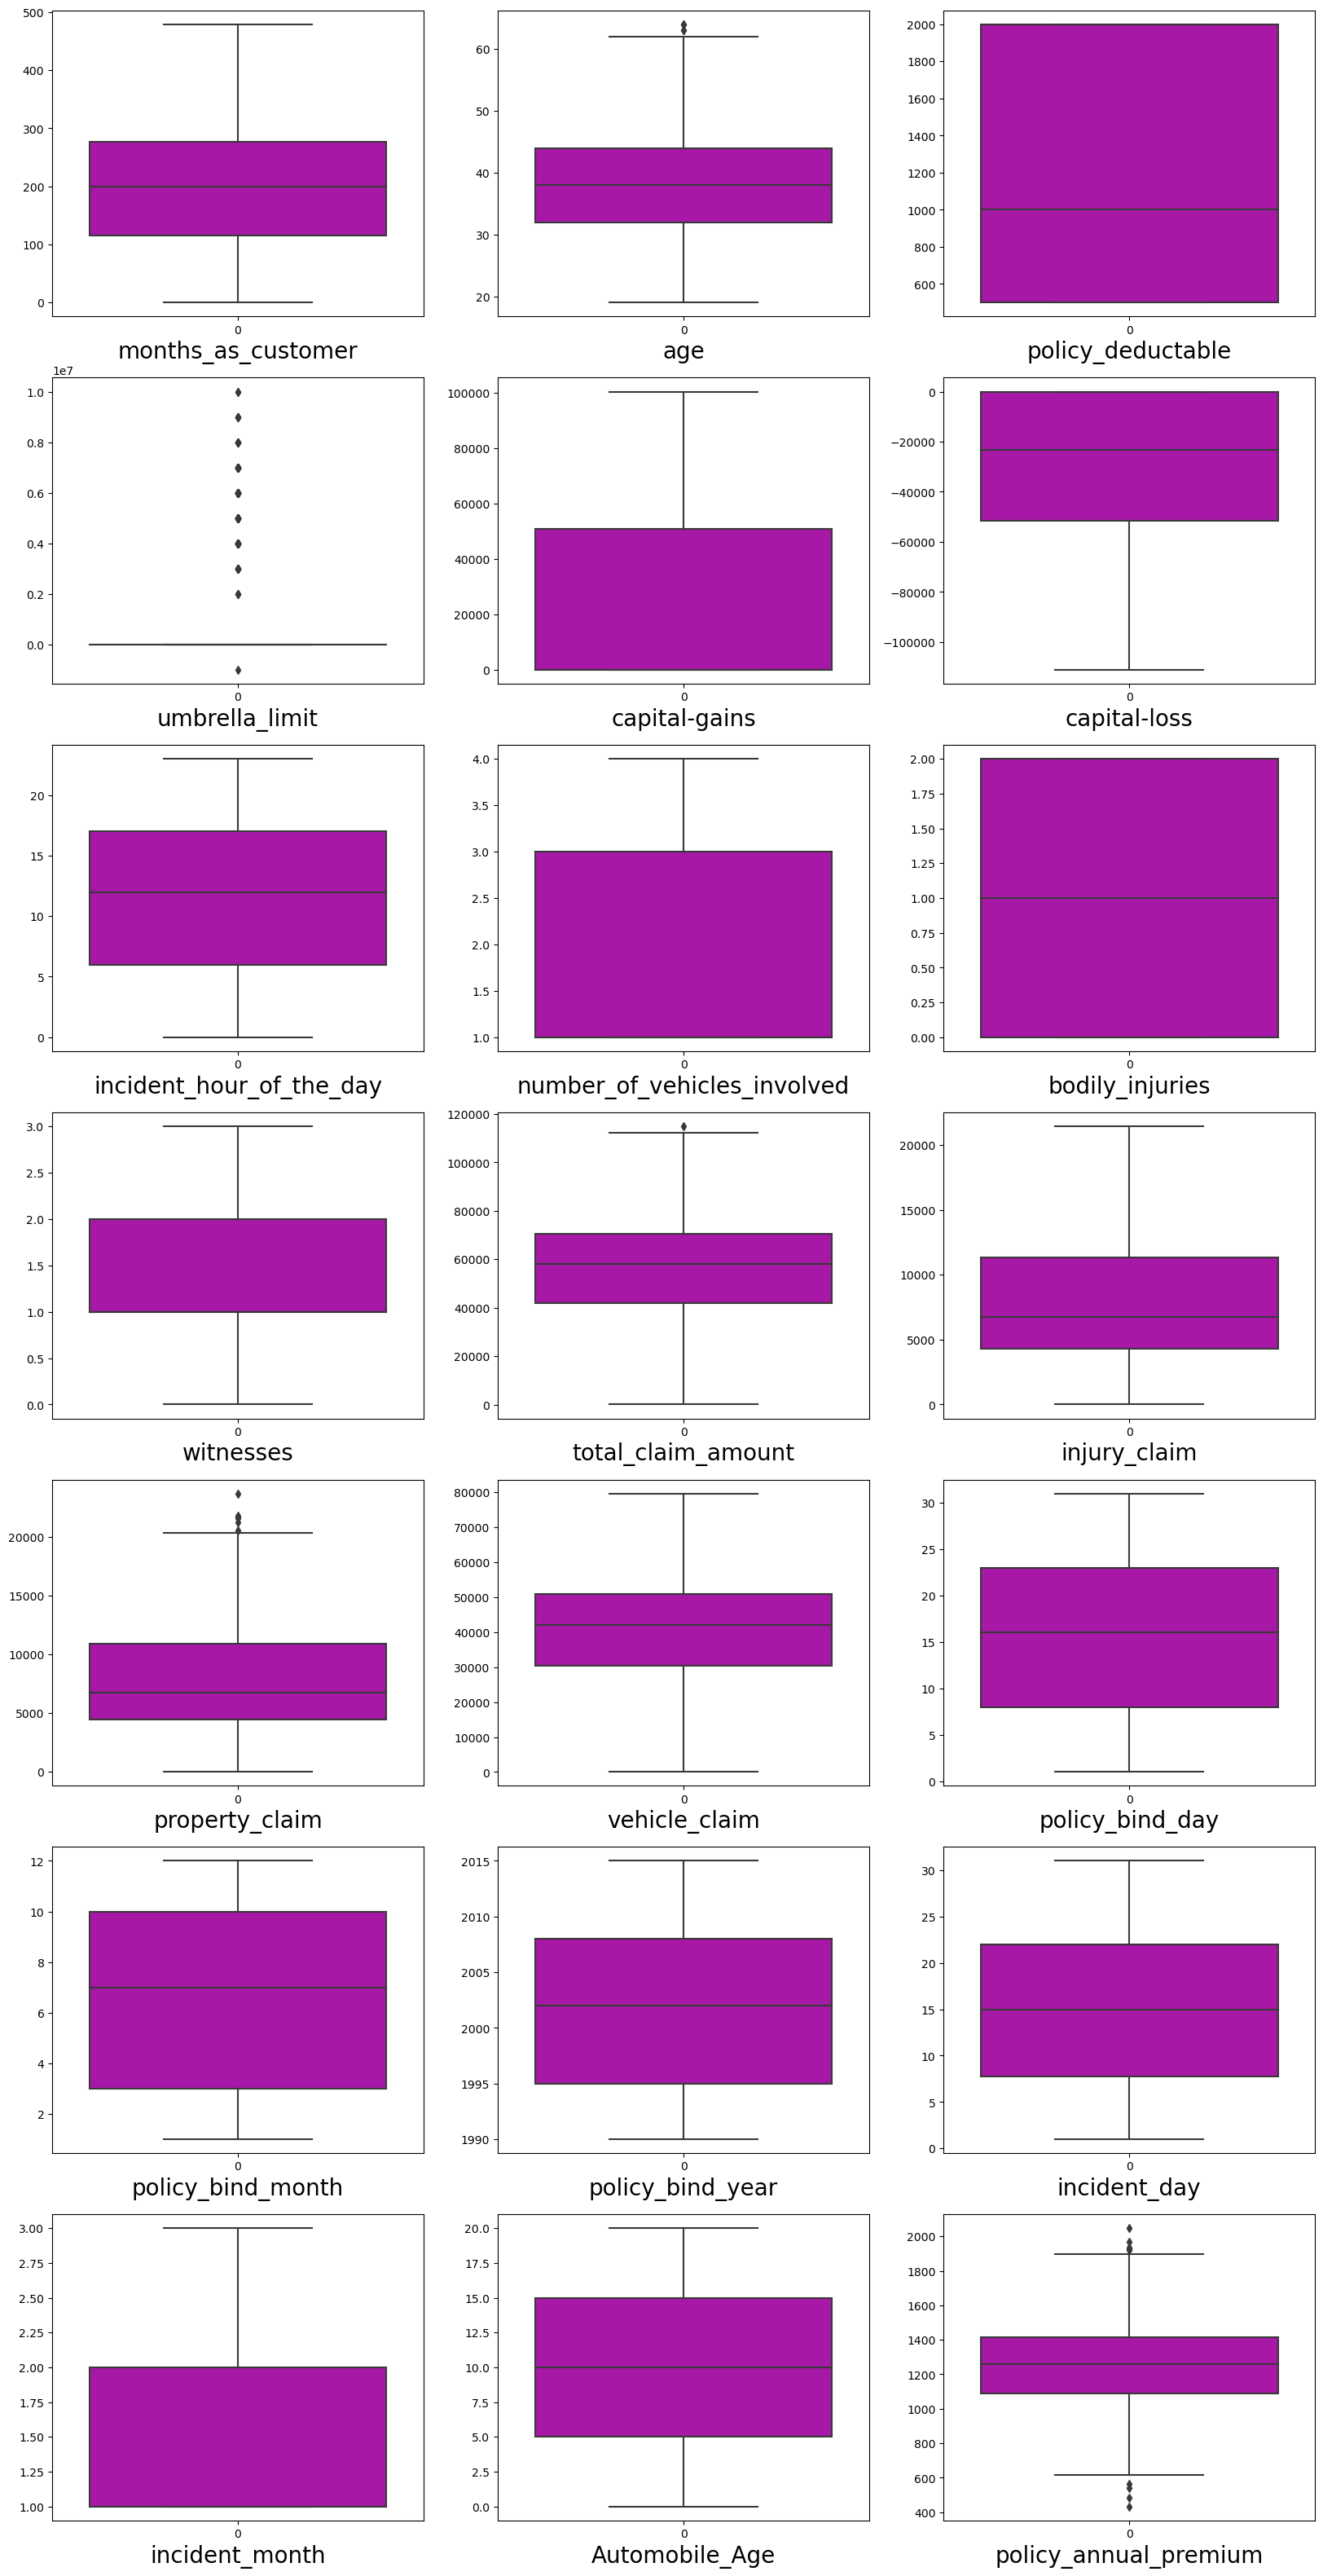

In [57]:
plt.figure(figsize=(20,40),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='m')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see that outliers exist so we will try to remove them.

In [58]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3

In [59]:
df=df[(z<3).all(axis = 1)]
df.shape

(980, 40)

In [60]:
# Lets calculate percentage data loss.
((1000-980)/1000)*100

2.0

We are suffering a data loss of 2% which is bearable. Let's proceed forward.

## Checking Skewness

In [61]:
df[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
policy_bind_day                0.054173
policy_bind_month             -0.029021
policy_bind_year               0.065022
incident_day                   0.037814
incident_month                 0.259907
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

We can see that umbrella_limit,total_claim_amount and vehicle_claim have skewness. We will use yeo-johnson method as we have negative values too.

In [62]:
skew=['total_claim_amount','vehicle_claim']

In [63]:
# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [64]:
df[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

Although skewness was not removed but it got reduced.

# Correlation between Independent variable and Target variable

In [65]:
cor=df.corr()

<Axes: >

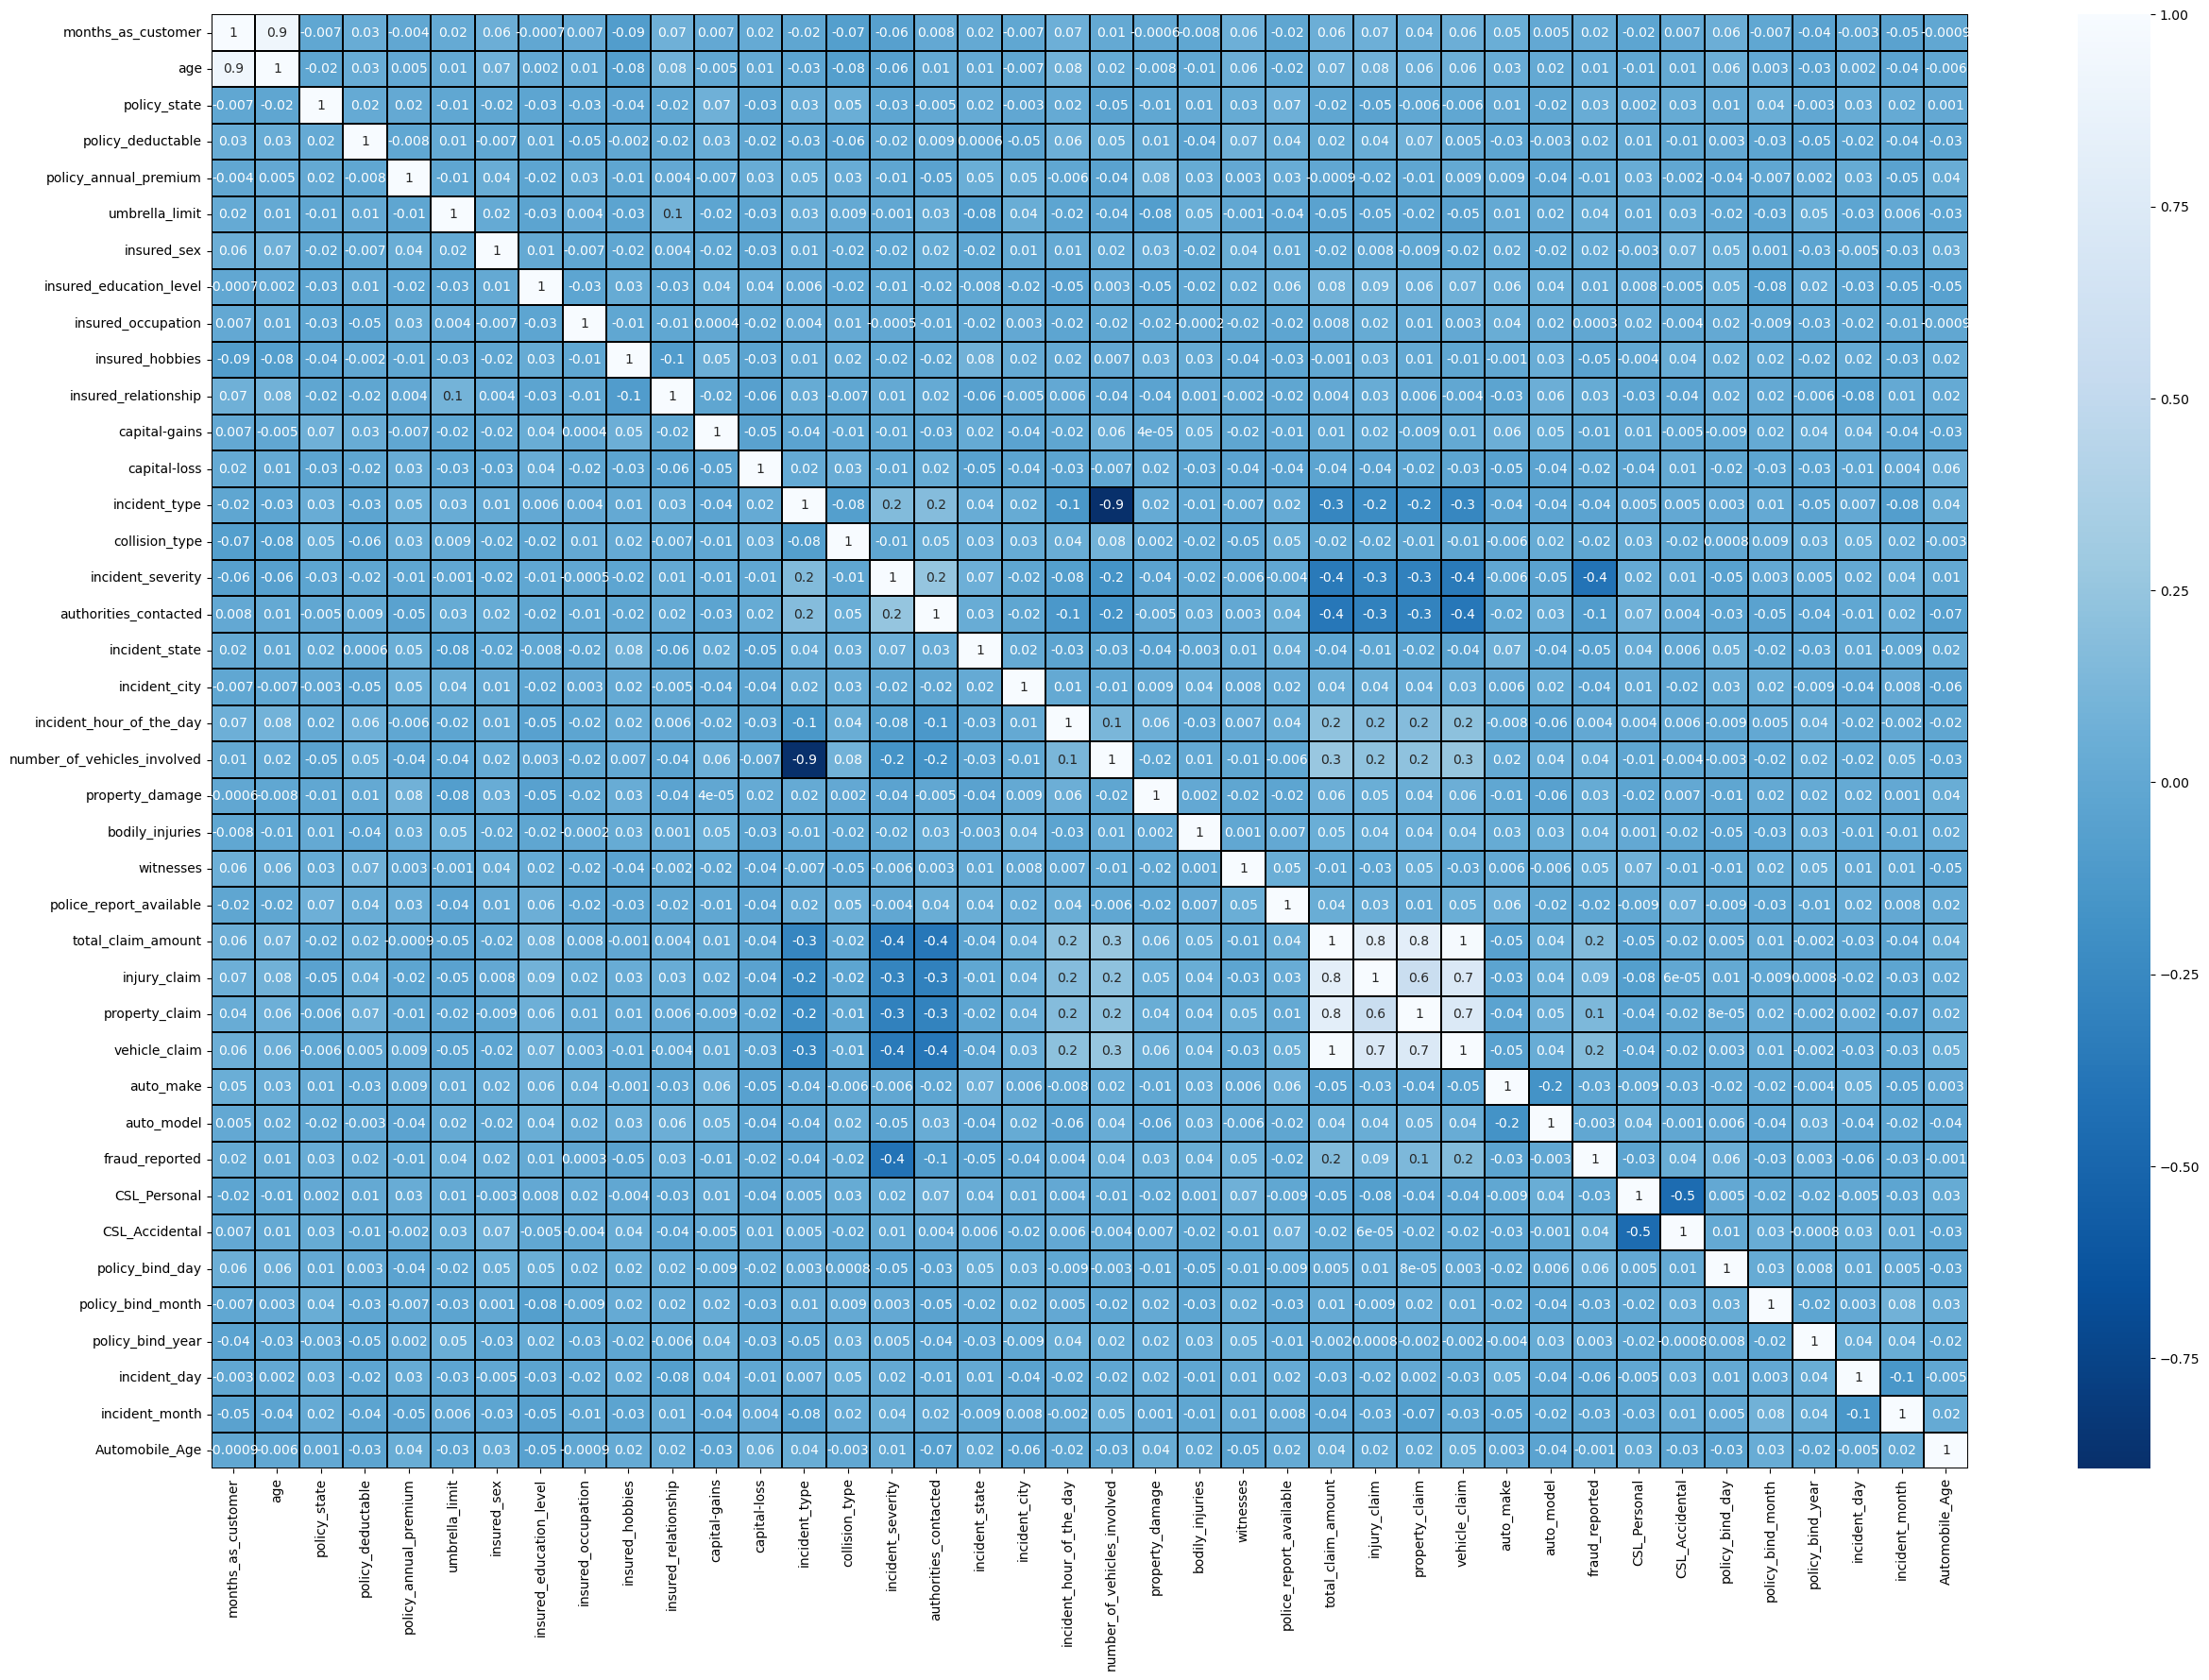

In [67]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),linewidth = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")

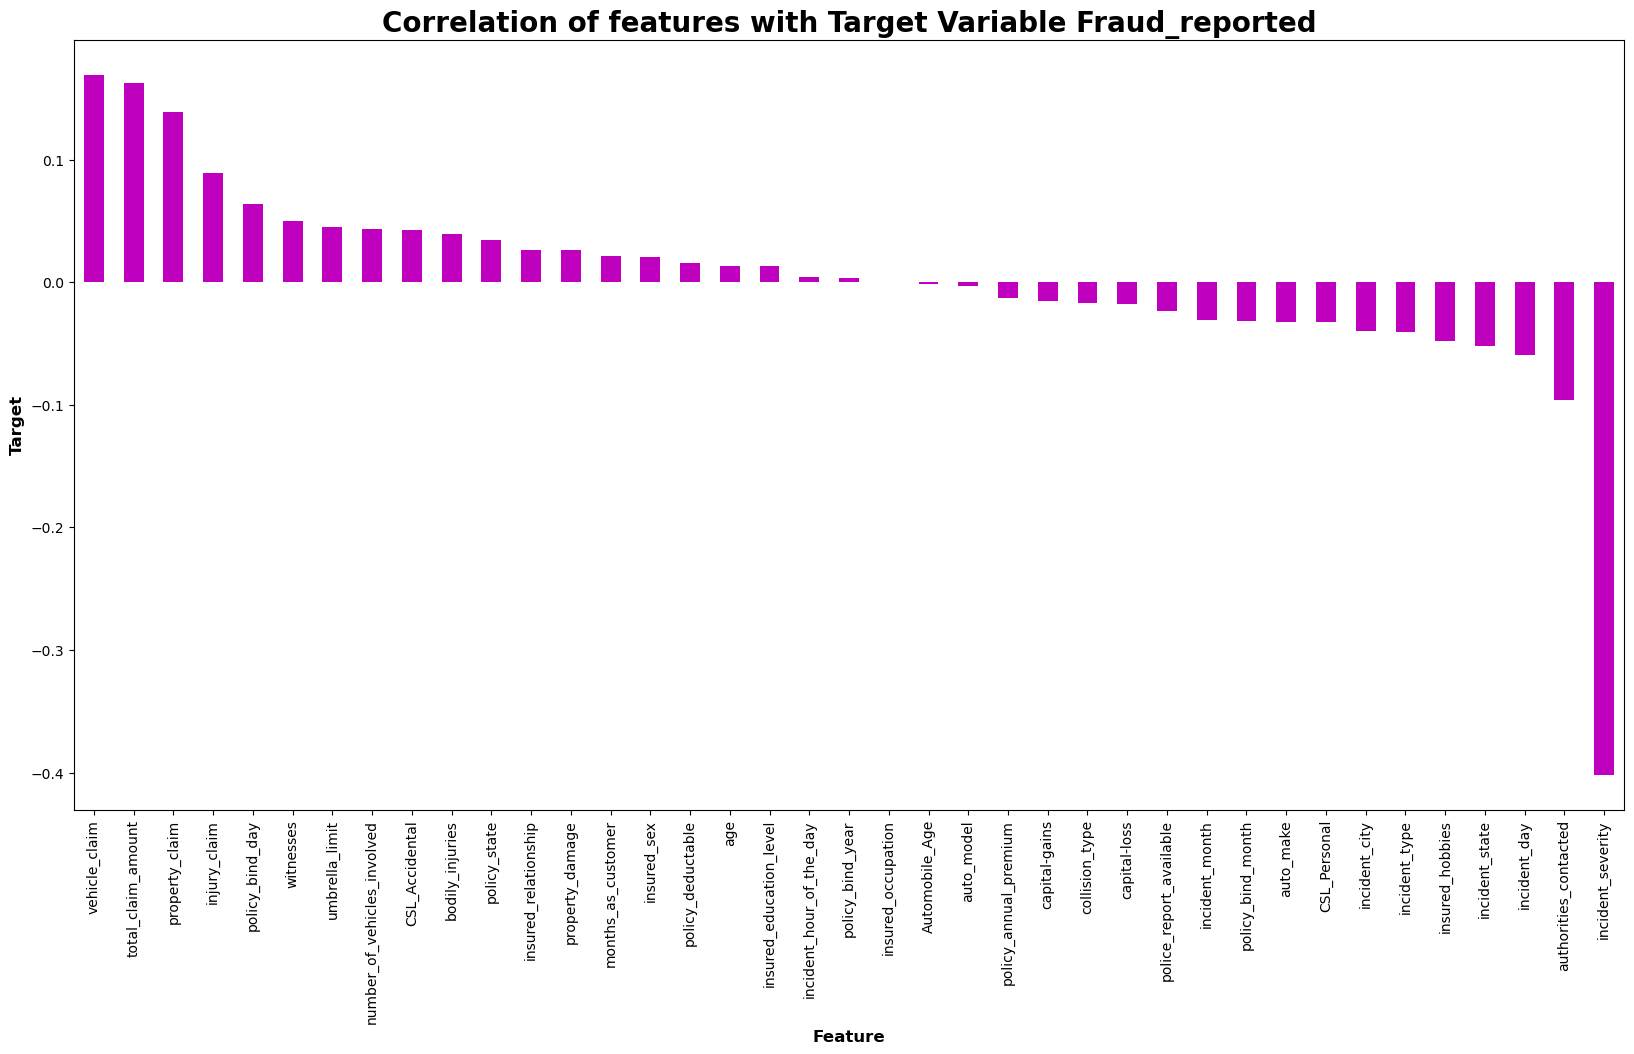

In [68]:
plt.figure(figsize=(20,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=12,fontweight='bold')
plt.ylabel('Target',fontsize=12,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

incident_severity is correlated to our target variable. Other variable are not much correlated, thay are somewhat poorly corrleated.vehicle_claim, property_claim and total_claim_amount are correlated with each other.

# Balancing Target Feature

## Using SMOTE

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
# Splitting data in target and dependent feature
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [71]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [72]:
Y.value_counts()

fraud_reported
1    740
0    740
Name: count, dtype: int64

We have now balanced our target, now we will proceed further so as to make sure that our data is not biased.

## Standard Scalarization

In [73]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Variance Inflation Factor

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,28.691075,months_as_customer
1,131.836380,age
2,2.591919,policy_state
3,4.652691,policy_deductable
4,29.196116,policy_annual_premium
5,1.272634,umbrella_limit
6,1.941454,insured_sex
7,3.474838,insured_education_level
8,3.799431,insured_occupation
9,4.142358,insured_hobbies


We can remove highly correlated features but it will create problems as some features are correlated to each other poorly or moderately. Lets go for PCA.

## PCA

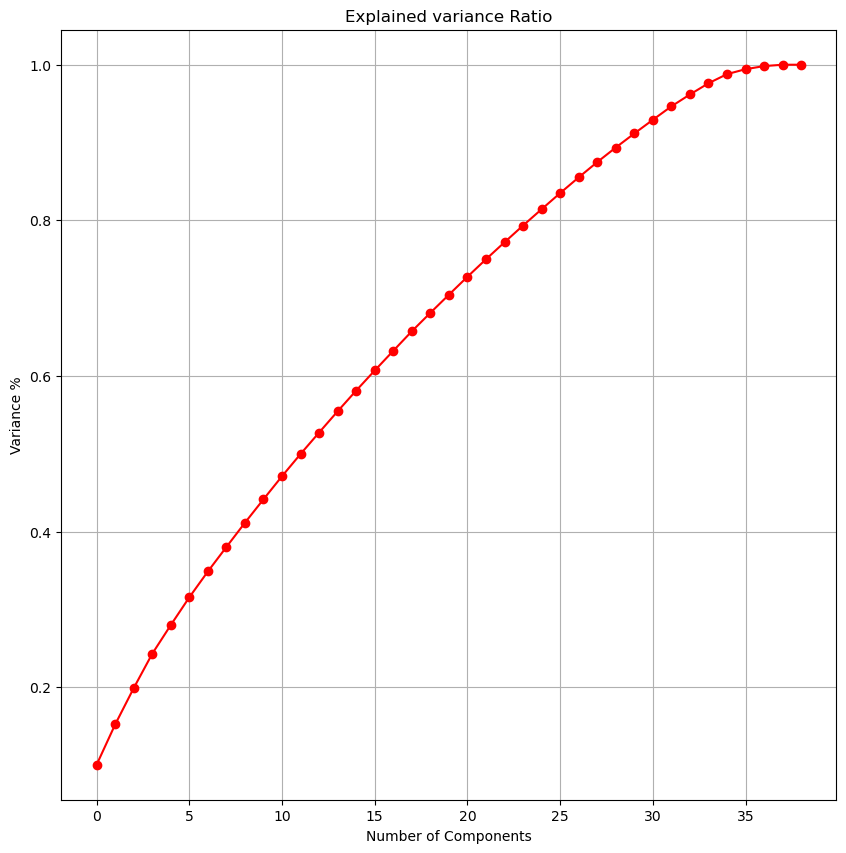

In [75]:
from sklearn.decomposition import PCA
pca = PCA()
#Plot the graph to find the principal components
X_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

According to the graph, we can see that 28 principal components contribute for 90% of variation in our data. We shall then pick the first 28 components for our analysis.

In [76]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [77]:
Principle_x=pd.DataFrame(x_new,columns=np.arange(28))

# Model Building

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(Principle_x, Y, random_state=70, test_size=.25)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (1110, 28)
Training target size: (1110,)
Test feature size: (370, 28)
Test target size: (370,)


## Finding Best Random State

In [80]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(Principle_x,Y,test_size = 0.25, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8216216216216217 on Random_state 187


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(Principle_x, Y, random_state=28, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')

accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy: 0.754054054054054
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       171
           1       0.77      0.77      0.77       199

    accuracy                           0.75       370
   macro avg       0.75      0.75      0.75       370
weighted avg       0.75      0.75      0.75       370



In [82]:
model=[ 
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    accuracy = accuracy_score(Y_test, y_pred)
    print('Accuracy:', accuracy)

    print('Classification Report:')
    print(classification_report(Y_test, y_pred))

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy: 0.7972972972972973
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       171
           1       0.85      0.76      0.80       199

    accuracy                           0.80       370
   macro avg       0.80      0.80      0.80       370
weighted avg       0.80      0.80      0.80       370

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy: 0.6864864864864865
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       171
           1       0.72      0.68      0.70       199

    accuracy                           0.69       370
   macro avg       0.69      0.69      0.69       370
weighted avg       0.69      0.69      0.69       370

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy: 0.7918918918918919
Clas

# Cross Validation Score

In [83]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, Principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print('\n')
    print('============================================================')



Cross Validation Score LogisticRegression() :

Score : [0.62162162 0.69594595 0.83108108 0.84121622 0.84797297]
Mean Score : 0.7675675675675675




Cross Validation Score SVC() :

Score : [0.60135135 0.73986486 0.89864865 0.91216216 0.92567568]
Mean Score : 0.8155405405405405




Cross Validation Score DecisionTreeClassifier() :

Score : [0.59459459 0.625      0.73648649 0.78716216 0.72972973]
Mean Score : 0.6945945945945946




Cross Validation Score RandomForestClassifier() :

Score : [0.5777027  0.73310811 0.89189189 0.89189189 0.92905405]
Mean Score : 0.8047297297297298




Cross Validation Score ExtraTreesClassifier() :

Score : [0.64527027 0.77702703 0.89189189 0.91554054 0.95945946]
Mean Score : 0.8378378378378379




From the above two cases Extra Tree Classifier is showing good results whether it is accuracy and also mean score. So choosing it as our final model.

# Hyperparameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [86]:
GSCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GSCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [87]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 300}

# Final Model

In [89]:
Final_model = ExtraTreesClassifier(criterion='gini',n_estimators= 300, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_model.fit(X_train,Y_train)
y_pred=Final_model.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8324324324324325


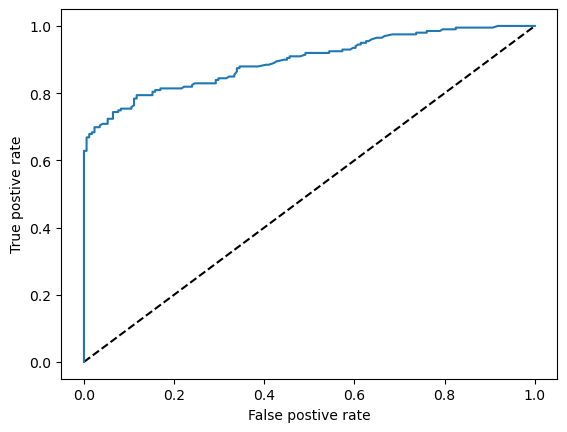

Auc Score :
 0.8359928296453025


In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_model.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [93]:
# Saving model
import joblib
joblib.dump(Final_model,'Insurance_claims_Project.pkl')

['Insurance_claims_Project.pkl']